In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions 

In [72]:
def evaluation(y_true, y_pred, title = ""):
    """
    This function is used to compute the confusion matrix 
    and other evaluation metrics.
    """
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix for {}: \n'.format(title), cm)
    total = sum(sum(cm))
    
    print('=============')
    accuracy = (cm[0,0] + cm[1,1]) /total
    print ('Accuracy    : {}'.format(accuracy))
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    print('Specificity :  {}'.format(Specificity))
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    print('Sensitivity :  {}'.format(sensitivity))
    
    
def plot_swarm(x, y, df):
    sns.set()
    sns.swarmplot(x=x, y = y, data = df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

### EDA 

### 1. users data 
- no duplicates in user_id
- non-null objects

In [2]:
user_df = pd.read_csv("users.csv")
user_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [3]:
user_df["user_id"].nunique()

22576

In [4]:
user_df.shape[0] == user_df["user_id"].nunique()

True

In [5]:
display(user_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       22576 non-null  int64 
 1   install_date  22576 non-null  object
 2   lang          22576 non-null  object
 3   country       22564 non-null  object
 4   hw_ver        22576 non-null  object
 5   os_ver        22576 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


None

### 2. sessions data 

In [6]:
sessions_df = pd.read_csv("sessions.csv")
sessions_df.head()

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
1,14067,2019-03-01 00:22:27,2019-03-01,2,NaN
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN


In [7]:
sessions_df.drop_duplicates().shape

(722831, 5)

In [8]:
sessions_df.shape

(722955, 5)

### 3. iaps data 

In [9]:
iaps_df = pd.read_csv("iaps.csv") ## this is for game adminitratiion's side
iaps_df.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [10]:
iaps_df.shape

(6685, 6)

In [11]:
iaps_df.user_id.nunique()

1526

In [12]:
iaps_df[iaps_df.user_id == 2062].sort_values(by="ts") 

,user_id,ts,date,prod_name,prod_type,rev
3795,2062,2019-03-03 03:50:45,2019-03-03,iap_1_gems_2,gems,760
3796,2062,2019-03-03 03:50:58,2019-03-03,iap_1_gems_2,gems,760
3797,2062,2019-03-03 04:01:32,2019-03-03,iap_1_passes_2,chapterPasses,760
3798,2062,2019-03-03 04:07:34,2019-03-03,iap_1_gems_2,gems,760
3799,2062,2019-03-03 10:40:27,2019-03-03,iap_1_passes_2,chapterPasses,760


### 4. spendevents data 

In [13]:
spending_df = pd.read_csv("spendevents.csv")
spending_df.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [14]:
spending_df[spending_df.user_id == 2062].sort_values(by="ts") ### this is for game adminitratiion's side

,user_id,ts,date,story,chapter,spendtype,currency,amount
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27


# Graphical EDA and insights 

### 1. Find the golden time 
- how long does it take for a new user to make the firsr in-app purchase

In [55]:
users_iaps = pd.merge(user_df, iaps_df, on = "user_id")
users_iaps["date"] = pd.to_datetime(users_iaps["date"])
users_iaps["install_date"] = pd.to_datetime(users_iaps["install_date"])
users_iaps

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410
...,...,...,...,...,...,...,...,...,...,...,...
6680,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:39:35,2019-03-11,iap_1_gems_2,gems,760
6681,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:42:20,2019-03-11,iap_1_gems_2,gems,760
6682,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:12,2019-03-20,iap_1_gems_2,gems,760
6683,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:49,2019-03-20,iap_1_passes_2,chapterPasses,760


In [80]:
users_iaps[users_iaps.user_id == 36]

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase,rank
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0,1
5,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:58,2019-03-02,iap_1_gems_1,gems,410,0,2
6,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:37:46,2019-03-02,iap_1_gems_2,gems,760,0,3
7,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:47:54,2019-03-02,iap_1_passes_5,chapterPasses,1810,0,4
8,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:03:26,2019-03-03,iap_1_gems_1,gems,410,1,5
9,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:04:04,2019-03-03,iap_1_gems_2,gems,760,1,6


In [56]:
users_iaps["days_to_first_purchase"] = users_iaps["date"] - users_iaps["install_date"]
users_iaps["days_to_first_purchase"] = users_iaps["days_to_first_purchase"].dt.days
users_iaps.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760,2
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760,3
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0


In [ ]:
# df_test = users_iaps[users_iaps.user_id == 51]
users_iaps["rank"] = users_iaps.groupby(["user_id"])["days_to_first_purchase"].rank(method="first", ascending=True)
users_iaps["rank"] = users_iaps["rank"].astype(int)
users_iaps.head()

In [75]:
paying_users_df = users_iaps[users_iaps["rank"]==1]
paying_users_df.shape

(1526, 13)

<AxesSubplot:>

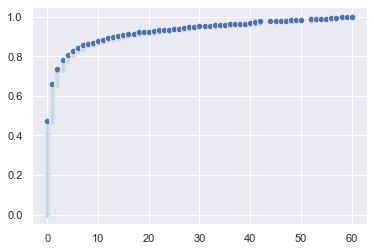

In [78]:
sns.set()
x_ecdf, y_ecdf = ecdf(paying_users_df["days_to_first_purchase"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of ")

In [45]:
users_iaps.shape

(6685, 12)

In [20]:
iaps_df.shape

(6685, 6)

In [ ]:

### 2. Find the main difference features/distribution ft that seperates two groups well 
### 3. Cluster according that features
### 4. 

In [ ]:
# Model 
- Paying users are class 1 
- Non-paying users are class 0
